In [1]:
import numpy as np
import random
import time
from gyms.frozen_lake import FrozenLakeEnvJP


class QLearning:
    
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.env = env
        # Initialize the state-action matrix (Q-table) with zeros
        # self.state_action_matrix = np.zeros((env.observation_space.n, env.action_space.n))
        
        self.state_action_matrix = np.random.uniform(0, 1, (env.observation_space.n, env.action_space.n))
        
        self.learning_rate = learning_rate  # Alpha
        self.discount_factor = discount_factor  # Gamma
        self.exploration_rate = exploration_rate  # Epsilon (for exploration)
        self.exploration_decay = exploration_decay  # Epsilon decay

    def act(self, state):
        # Epsilon-greedy policy: with probability exploration_rate, choose a random action
        if random.uniform(0, 1) < self.exploration_rate:
            return self.env.action_space.sample()  # Random action
        else:
            # Choose the action with the highest Q-value  for the current state
            return self.predict(state)
    
    def predict(self, state):
        return np.argmax(self.state_action_matrix[state, :])

    def step(self, state, action, reward, next_state, done):
        # Update the Q-value using the Q-Learning update rule
        next_action = self.predict(next_state)
        
        td_target = reward + self.discount_factor * self.state_action_matrix[next_state, next_action]
        td_delta = td_target - self.state_action_matrix[state, action]
        self.state_action_matrix[state, action] += self.learning_rate * td_delta

        # Decay exploration rate
        if done:
            self.exploration_rate *= self.exploration_decay



/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/gym/core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [32]:
# Create the FrozenLake environment
env = FrozenLakeEnvJP(is_slippery=True)

# one episode

In [3]:
# Initialize the QLearning strategy
strategy = QLearning(env)

# Reset the environment to the initial state
state = env.reset()[0]

# Render the initial state (not in the FrozenLakeV1 class but showing how to work with Q-Learning)
env.render(step_number=0)

# Play the game by following the Q-Learning strategy
for step in range(100):
    action = strategy.act(state)  # Select action based on the current state
    next_state, reward, done, truncated, info = env.step(action)  # Apply the action to the environment
    
    # Render the updated environment after each action
    env.render(step_number=step+1)

    # Update the Q-Learning state-action matrix
    strategy.step(state, action, reward, next_state, done)
    
    # Transition to the next state
    state = next_state

    if done or truncated:
        print("Game Over!")
        time.sleep(1)
        break

# Close the environment
env.close()


Game Over!


# Multiple Episodes

In [ ]:
def intented_state(state, action):
    row, col = state // 4, state % 4  # Get the row and col of the current state
    
    if action == 0:  # Left
        state_i = max(state - 1, 0)
    elif action == 1 and row < 3:  # Down
        state_i = min(state + 4, 15)
    elif action == 2 and col < 3:  # Right
        state_i = min(state + 1, 15)
    else:  # action == 3 and row > 0:  # Up
        state_i = max(state - 4, 0)
    return state_i

def state2state_tuple(state):
    return f"({state//4}, {state%4})"

In [38]:
# Initialize the QLearning strategy
strategy = QLearning(env, exploration_rate=0.4, learning_rate=0.7)

In [39]:
actions = ["left", "down", "right", "up"]

# Define number of episodes
num_episodes = 100
max_steps_per_episode = 100

# Track the rewards per episode (optional)
episode_rewards = []

for episode in range(num_episodes):
    # Reset the environment to the initial state at the start of each episode
    state = env.reset()[0]  # Extract the actual state from the reset
    
    total_reward = 0  # Initialize the reward tracker for this episode

    # Play the game by following the Q-Learning strategy
    for step in range(max_steps_per_episode):
        
        action = strategy.act(state)  # Select action based on the current state
        next_state, reward, done, truncated, info = env.step(action)  # Apply the action to the environment

        if done and reward == 1:
            reward = 5
        elif done:
            reward = -2
        elif state == next_state:
            reward = 0
        else:
            reward = 0
        
        """
        state_i = intented_state(state, action)
        print(f"take action: {actions[action]}")
        
        if state_i != next_state:
            print(f"intented state: {state2state_tuple(state_i)}" + f" | actual state: {state2state_tuple(next_state)}")
        else:
            print(f"into state: {state2state_tuple(state_i)}")
            
        print(f"1) get reward: {reward}")
        old_value = strategy.state_action_matrix[state][action]

        """
        
        # Update the Q-Learning state-action matrix
        strategy.step(state, action, reward, next_state, done)
        
        """
        potential = strategy.state_action_matrix[next_state][strategy.predict(next_state)]
        print(f"2) the best next action give potential: {potential}")
        
        print(f"> (r, p)=({reward:.02f}, {potential:.02f})")
        print("---"*3)
        print(f"Update SA[{state2state_tuple(state)}][{action}] from {old_value:.02f} to {strategy.state_action_matrix[state][action]:.02f}")
        
        """
        
        if episode == num_episodes-1:
            env.render2(strategy.state_action_matrix, step_number=step+1, episode_number=episode+1)
        
        # time.sleep(20)
        
        # Transition to the next state
        state = next_state
        total_reward += reward  # Accumulate the reward

        if done:
            print(f"Episode {episode + 1} done in {step + 1} steps with total reward: {total_reward}")
            time.sleep(1)
            break
        if truncated:
            print(f"Episode {episode + 1} finished in {step + 1} steps with total reward: {total_reward}")
            time.sleep(1)
            break

    # Log the total reward for this episode
    episode_rewards.append(total_reward)

# Close the environment after all episodes
env.close()



Episode 100 done in 9 steps with total reward: -2


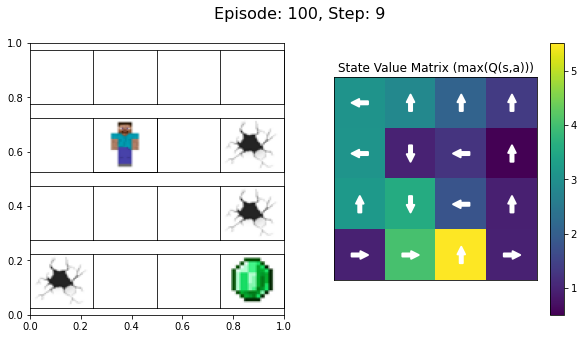

In [40]:
env.render2(strategy.state_action_matrix, step_number=step+1, episode_number=episode+1)
        

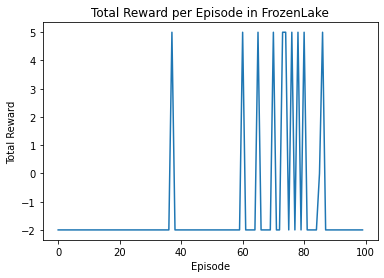

In [41]:
# Optional: Analyze performance over episodes
import matplotlib.pyplot as plt

# Plot the total reward over time to see the agent's improvement
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode in FrozenLake')
plt.show()